In [32]:
import pandas as pd
import numpy as np
import requests
import re
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import time

In [14]:
boardGames = pd.read_csv("boardgamesData.csv")

In [15]:
boardGames

,Title,Year Published,Min Players,Max Players,Playing Time,Age Minimum,Number of Accessories,Number of Ratings,Average Rating,Bayes Rating,Standard Deviation,Average USD Price,Age (Years),Time Category,AgeRating,GroupSize
0,Brass: Birmingham,2018,2,4,120,14,15,41589,8.60841,8.42243,1.41849,144.334286,5,Long,Teen,Small
1,Pandemic Legacy: Season 1,2015,2,4,60,13,1,51789,8.53305,8.38673,1.60207,54.641786,8,Short,Teen,Small
2,Gloomhaven,2017,1,4,120,14,55,60064,8.60914,8.37477,1.74605,127.098214,6,Long,Teen,Small
3,Ark Nova,2021,1,4,150,14,13,36307,8.53318,8.31867,1.37819,63.212143,2,Long,Teen,Small
4,Twilight Imperium: Fourth Edition,2017,3,6,480,14,18,21980,8.61092,8.24098,1.61959,131.515517,6,Marathon,Teen,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ascension: Storm of Souls,2011,1,4,30,13,3,3602,7.27642,6.60765,1.31682,NaN,12,Quick,Teen,Small
996,5-Minute Dungeon,2017,2,5,30,8,0,9422,6.93598,6.60714,1.35988,55.500000,6,Quick,Young,Large
997,Hawaii,2011,2,5,60,13,0,4491,7.11247,6.60619,1.28626,57.040000,12,Short,Teen,Large
998,Legacy: The Testament of Duke de Crecy,2013,1,4,60,8,2,4317,7.13235,6.60564,1.24950,38.037692,10,Short,Young,Small


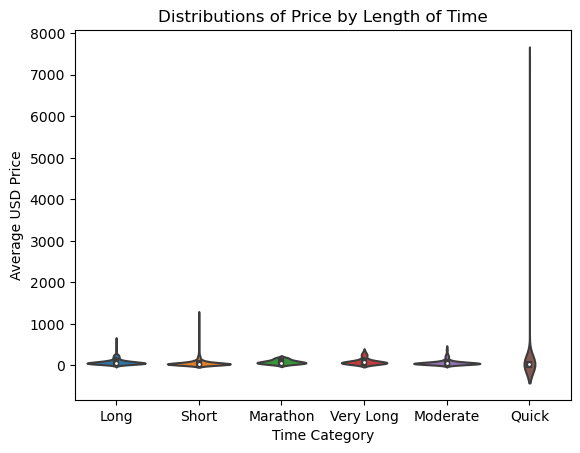

In [17]:
sns.violinplot(data=boardGames, y = "Average USD Price", x = "Time Category")
plt.title("Distributions of Price by Length of Time")
plt.savefig("EDAPlots/PriceDistbyTime")

<Axes: xlabel='Average Rating', ylabel='Number of Accessories'>

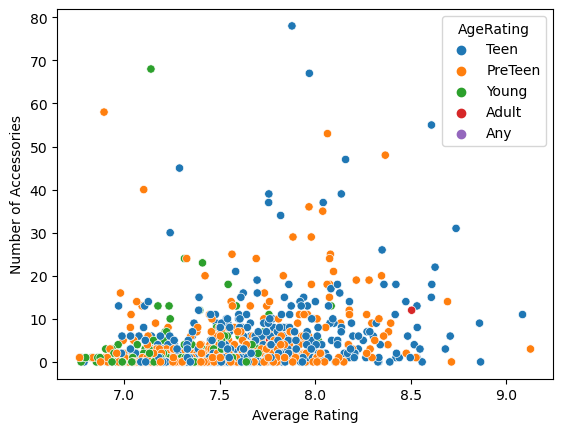

In [31]:
sns.scatterplot(data=boardGames, x = "Average Rating", y = "Number of Accessories", hue = "AgeRating")

In [27]:
boardGames["Age (Years)"].idxmax()
boardGames.loc[200]

Title                           Go
Year Published               -2200
Min Players                      2
Max Players                      2
Playing Time                   180
Age Minimum                      8
Number of Accessories            1
Number of Ratings            16872
Average Rating             7.64755
Bayes Rating               7.31349
Standard Deviation         1.90557
Average USD Price        27.225238
Age (Years)                   4223
Time Category                 Long
AgeRating                    Young
GroupSize                    Small
Name: 200, dtype: object

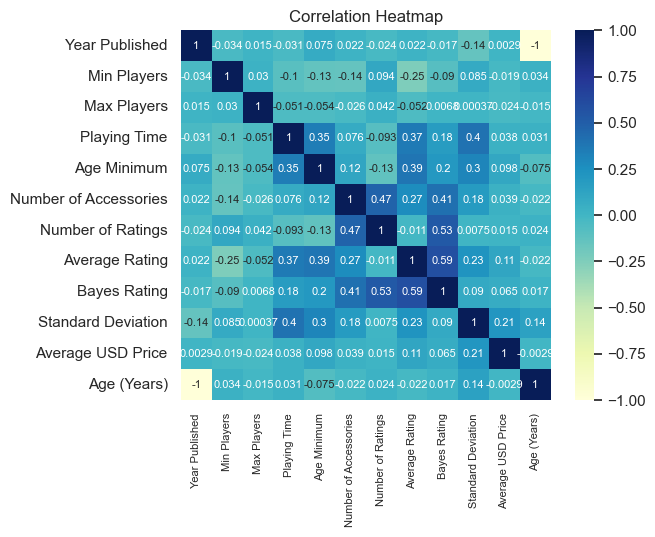

In [37]:
sns.set(font_scale =1.0) 
sns.heatmap(data = boardGames.corr(numeric_only=True), cmap="YlGnBu", annot = True, annot_kws = {'size': 8}, square = True).set(title="Correlation Heatmap")
plt.xticks(rotation=90, fontsize = 8)
plt.savefig("EDAPlots/correlationmatrix.png")